In [1]:
# import all important software needed to perform the neccessary functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\User\Downloads\nigeria-food-prices-1.csv")

In [2]:
df.head(2)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,1/15/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN
1,2/15/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13277 entries, 0 to 13276
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      13277 non-null  object 
 1   cmname    13277 non-null  object 
 2   unit      13277 non-null  object 
 3   category  13277 non-null  object 
 4   price     13277 non-null  float64
 5   currency  13277 non-null  object 
 6   country   13277 non-null  object 
 7   admname   13277 non-null  object 
 8   adm1id    13277 non-null  int64  
 9   mktname   13277 non-null  object 
 10  mktid     13277 non-null  int64  
 11  cmid      13277 non-null  int64  
 12  ptid      13277 non-null  int64  
 13  umid      13277 non-null  int64  
 14  catid     13277 non-null  int64  
 15  sn        13277 non-null  object 
 16  default   0 non-null      float64
dtypes: float64(2), int64(6), object(9)
memory usage: 1.7+ MB


## Data Cleaning - Data Completeness & Quality

In [4]:
# check for missing data
df.isna().sum()

date            0
cmname          0
unit            0
category        0
price           0
currency        0
country         0
admname         0
adm1id          0
mktname         0
mktid           0
cmid            0
ptid            0
umid            0
catid           0
sn              0
default     13277
dtype: int64

In [5]:
# drop column with missing data
df.drop(columns='default', inplace=True)

### Based on data completeness and quality, it shows that the data is complete and the default column was dropped due to NAN missing data and it is not going to be useful in our analysis.

### Missing data can be handled using different method e.g. using central tendency (mean, mode and median), forward fill, backforward fill or dropping the whole column data if it is not useful in our research

# EDA 

In [6]:
# Are there any anomalies or outliers in the pricing data?
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
0,1/15/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33
1,2/15/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33
2,3/15/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33
3,4/15/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33
4,5/15/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33


In [7]:
df.describe()

,price,adm1id,mktid,cmid,ptid,umid,catid
count,13277.000000,13277.000000,13277.000000,13277.000000,13277.000000,13277.000000,13277.000000
mean,8930.792036,13863.049936,1806.855238,194.281540,14.204112,10.795285,2.544249
std,9889.528106,24563.904637,359.119949,169.830316,0.403067,6.515444,2.477912
min,22.000000,2211.000000,1037.000000,51.000000,14.000000,5.000000,1.000000
25%,212.989900,2223.000000,1969.000000,65.000000,14.000000,9.000000,1.000000
50%,6375.000000,2226.000000,1973.000000,99.000000,14.000000,9.000000,1.000000
75%,14760.000000,2240.000000,1977.000000,285.000000,14.000000,9.000000,5.000000
max,90000.000000,65710.000000,1982.000000,484.000000,15.000000,33.000000,8.000000


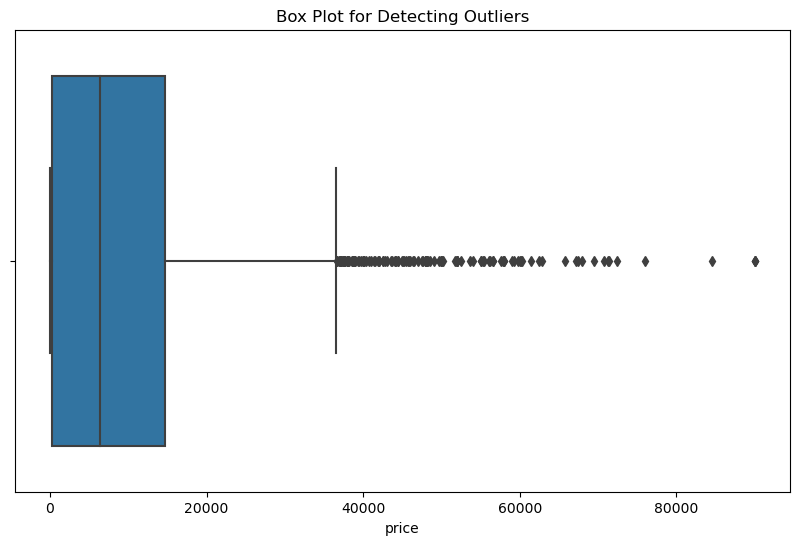

In [8]:
# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])

# Customize the plot
plt.title('Box Plot for Detecting Outliers')
plt.xlabel('price')

# Show the plot
plt.show()

## This shows a lot of outliers in the data for price of commodity

## Based on the pricing data, it shows that there is some outliers as the maximum shows 90,000 while its mean shows 13277 with a minimum of 22. This indicates an indication of an outlier in the data
## Potential reasons for outliers can be due to purchasing price of buyers, economic factors, data handling errors, sampling and experimental errors, measurement errors etc

# Price Trends and Patterns

In [9]:
# How have commodity prices changed over time for four (your choice) different commodities?
df.head(2)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
0,1/15/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33
1,2/15/2015,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33


In [10]:
df.tail()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
13272,2/15/2018,Gari (white) - Wholesale,100 KG,cereals and tubers,9880.000,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977,483,14,9,1,1977_483_14_9
13273,3/15/2018,Gari (white) - Wholesale,100 KG,cereals and tubers,11310.000,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977,483,14,9,1,1977_483_14_9
13274,4/15/2018,Gari (white) - Wholesale,100 KG,cereals and tubers,12110.000,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977,483,14,9,1,1977_483_14_9
13275,5/15/2018,Gari (white) - Wholesale,100 KG,cereals and tubers,11148.000,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977,483,14,9,1,1977_483_14_9
13276,1/15/2018,Gari (white) - Retail,KG,cereals and tubers,165.913,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977,483,15,5,1,1977_483_15_5


In [11]:
df['cmname'].value_counts()

Millet - Wholesale                  1223
Rice (imported) - Wholesale         1147
Bread - Retail                       668
Fuel (diesel) - Retail               665
Fuel (petrol-gasoline) - Retail      660
Cowpeas (white) - Wholesale          650
Maize (white) - Wholesale            649
Sorghum (white) - Wholesale          641
Groundnuts (shelled) - Wholesale     634
Sorghum (brown) - Wholesale          609
Rice (local) - Wholesale             609
Cowpeas (brown) - Wholesale          604
Gari (white) - Wholesale             593
Maize (yellow) - Wholesale           591
Sorghum - Wholesale                  576
Maize - Wholesale                    571
Oil (palm) - Wholesale               529
Gari (yellow) - Wholesale            489
Yam - Wholesale                      353
Yam - Retail                         281
Oil (palm) - Retail                  139
Wheat - Wholesale                     61
Maize (yellow) - Retail               42
Rice (imported) - Retail              42
Gari (white) - R

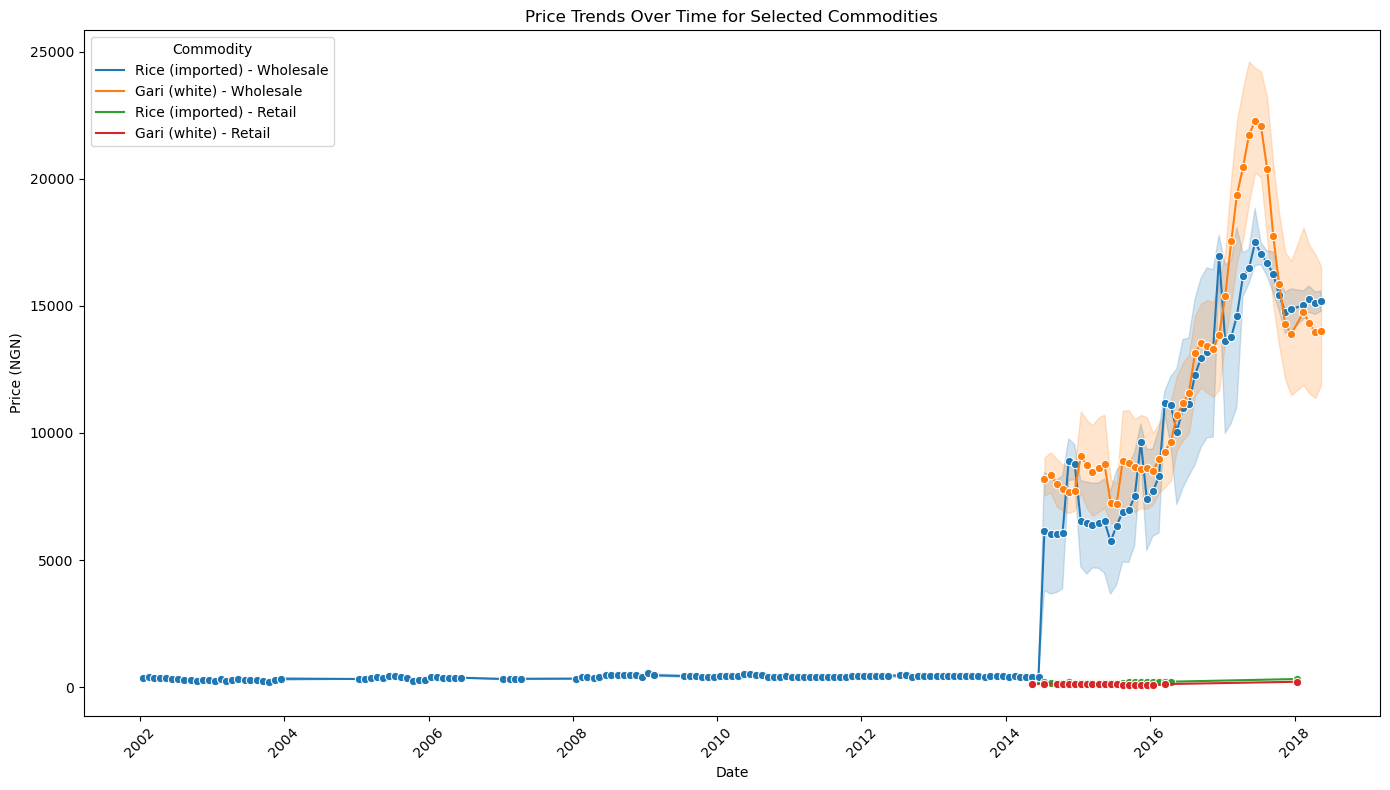

In [12]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Select the four commodities
commodities = [
    'Gari (white) - Wholesale',
    'Gari (white) - Retail',
    'Rice (imported) - Wholesale',
    'Rice (imported) - Retail'
]

# Filter the DataFrame for the selected commodities
df_filtered = df[df['cmname'].isin(commodities)]

# Plot the price trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered, x='date', y='price', hue='cmname', marker='o')

# Customize the plot
plt.title('Price Trends Over Time for Selected Commodities')
plt.xlabel('Date')
plt.ylabel('Price (NGN)')
plt.legend(title='Commodity')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# Split the 'cmname' column into 'product', 'color', and 'market_type'
df[['product', 'color', 'market_type']] = df['cmname'].str.split(' ', 2, expand=True)

# Remove the parentheses around 'color'
df['color'] = df['color'].str.replace('[()]', '', regex=True)

# Print the modified DataFrame
print(df[['product', 'color', 'market_type', 'price']])

      product  color  market_type      price
0       Bread      -       Retail    140.000
1       Bread      -       Retail    140.000
2       Bread      -       Retail    140.000
3       Bread      -       Retail    140.000
4       Bread      -       Retail    140.000
...       ...    ...          ...        ...
13272    Gari  white  - Wholesale   9880.000
13273    Gari  white  - Wholesale  11310.000
13274    Gari  white  - Wholesale  12110.000
13275    Gari  white  - Wholesale  11148.000
13276    Gari  white     - Retail    165.913

[13277 rows x 4 columns]


In [14]:
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,product,color,market_type
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail
2,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail
3,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail
4,2015-05-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail


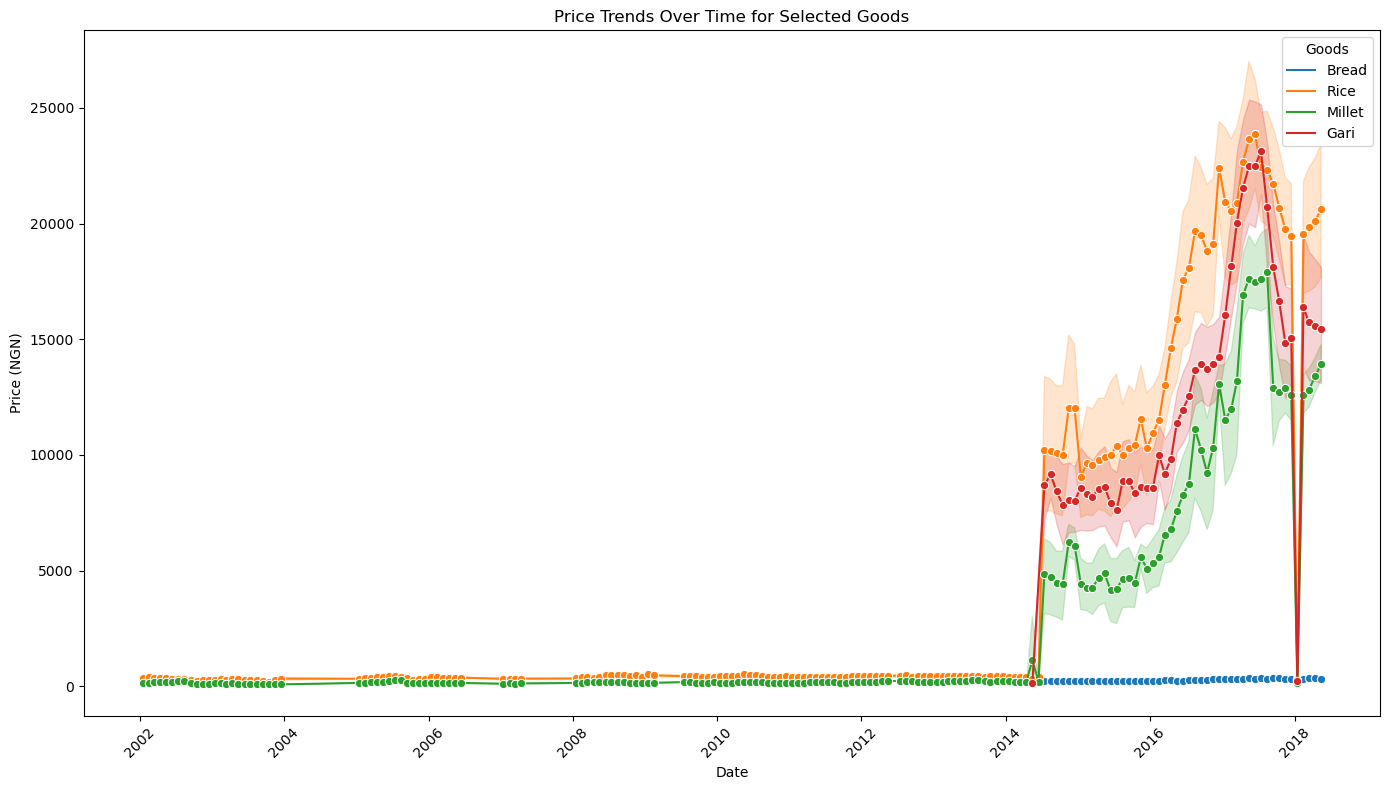

In [15]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Select the four goods
goods = [
    'Bread',
    'Gari',
    'Rice',
    'Millet'
]

# Filter the DataFrame for the selected commodities
df_filtered1 = df[df['product'].isin(goods)]

# Plot the price trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered1, x='date', y='price', hue='product', marker='o')

# Customize the plot
plt.title('Price Trends Over Time for Selected Goods')
plt.xlabel('Date')
plt.ylabel('Price (NGN)')
plt.legend(title='Goods')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## This shows that prices (4 commodities) remains constant from 2002 to 2014 q1 and started to increase from 2014 q2 and dropped in q1 of 2018 and increased again in 2018 q3. This shows that there was a trend in price data for selected commodities and products 

In [16]:
# How do commodity prices vary across different markets?
df.head(2)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,product,color,market_type
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail


<Axes: xlabel='mktname'>

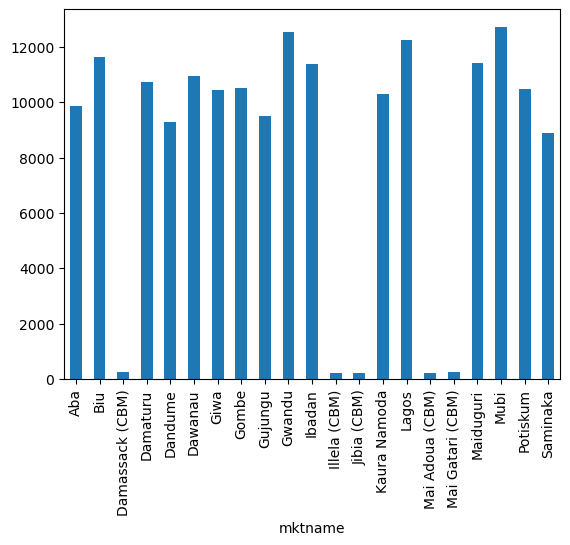

In [17]:
df.groupby('mktname')['price'].sum()
df.groupby('mktname')['price'].mean().plot.bar()

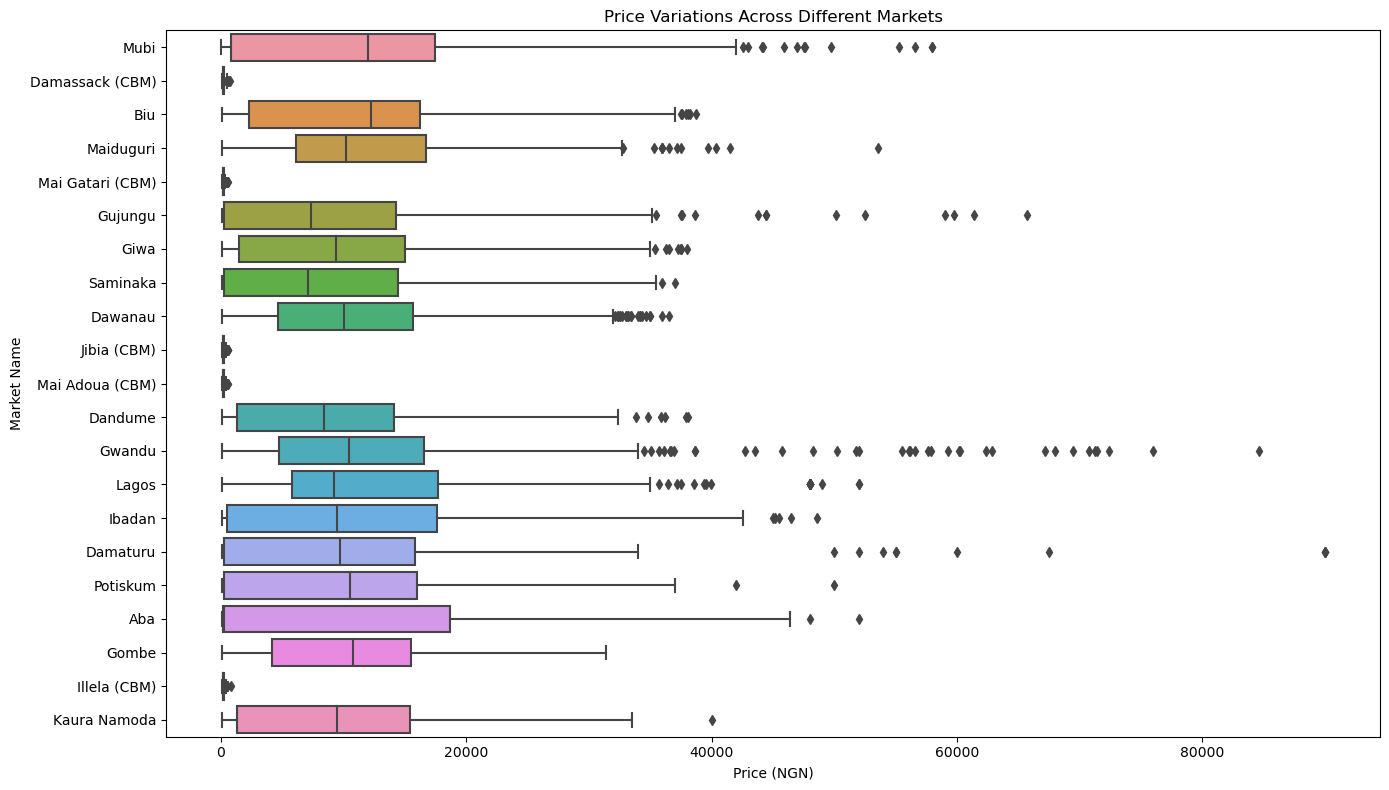

In [18]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot the price variations across different markets
plt.figure(figsize=(14, 8))
sns.boxplot(x='price', y='mktname', data=df)

# Customize the plot
plt.title('Price Variations Across Different Markets')
plt.xlabel('Price (NGN)')
plt.ylabel('Market Name')

# Show the plot
plt.tight_layout()
plt.show()

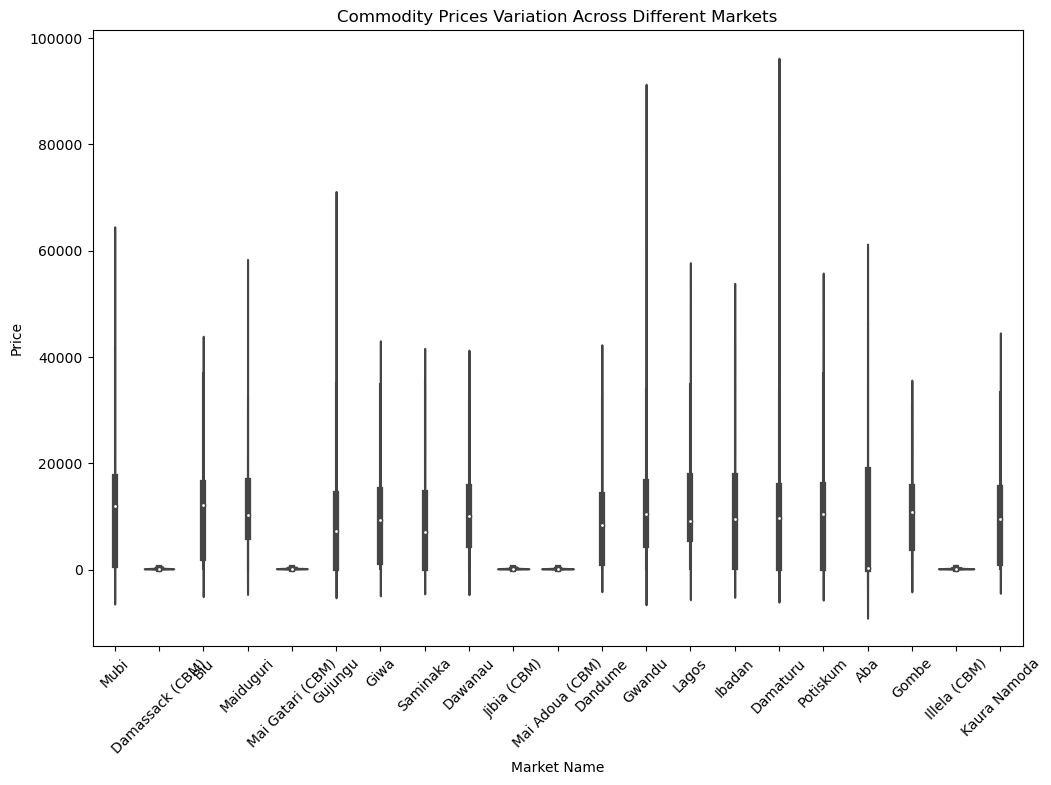

In [19]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='mktname', y='price', data=df)
plt.title('Commodity Prices Variation Across Different Markets')
plt.xlabel('Market Name')
plt.ylabel('Price')
plt.xticks(rotation=45)  
plt.show()

## This shows that prices varies in different market with exception of 5 different market that had a static price presence.

In [20]:
# Are there any provinces where certain commodities are consistently cheaper or more expensive?
df.head() 

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,product,color,market_type
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail
2,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail
3,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail
4,2015-05-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,Bread,-,Retail


In [21]:
# Split the 'cmname' column into 'product', 'color', and 'market_type'
df[['pro', 'market']] = df['cmname'].str.split(' ', 1, expand=True)

# Print the modified DataFrame
print(df[['pro', 'market', 'price']])

         pro               market      price
0      Bread             - Retail    140.000
1      Bread             - Retail    140.000
2      Bread             - Retail    140.000
3      Bread             - Retail    140.000
4      Bread             - Retail    140.000
...      ...                  ...        ...
13272   Gari  (white) - Wholesale   9880.000
13273   Gari  (white) - Wholesale  11310.000
13274   Gari  (white) - Wholesale  12110.000
13275   Gari  (white) - Wholesale  11148.000
13276   Gari     (white) - Retail    165.913

[13277 rows x 3 columns]


In [22]:
df.head(2)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,...,cmid,ptid,umid,catid,sn,product,color,market_type,pro,market
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,...,55,15,33,1,1980_55_15_33,Bread,-,Retail,Bread,- Retail
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,...,55,15,33,1,1980_55_15_33,Bread,-,Retail,Bread,- Retail


In [23]:
average_prices = df.groupby(['admname', 'pro'])['price'].mean().reset_index()

In [24]:
average_prices

,admname,pro,price
0,Abia,Bread,211.486742
1,Abia,Cowpeas,33687.916667
2,Abia,Fuel,147.700000
3,Abia,Gari,29087.916667
4,Abia,Groundnuts,45410.833333
...,...,...,...
147,Zamfara,Millet,9297.895234
148,Zamfara,Oil,1089.515213
149,Zamfara,Rice,16151.749805
150,Zamfara,Sorghum,9665.655565


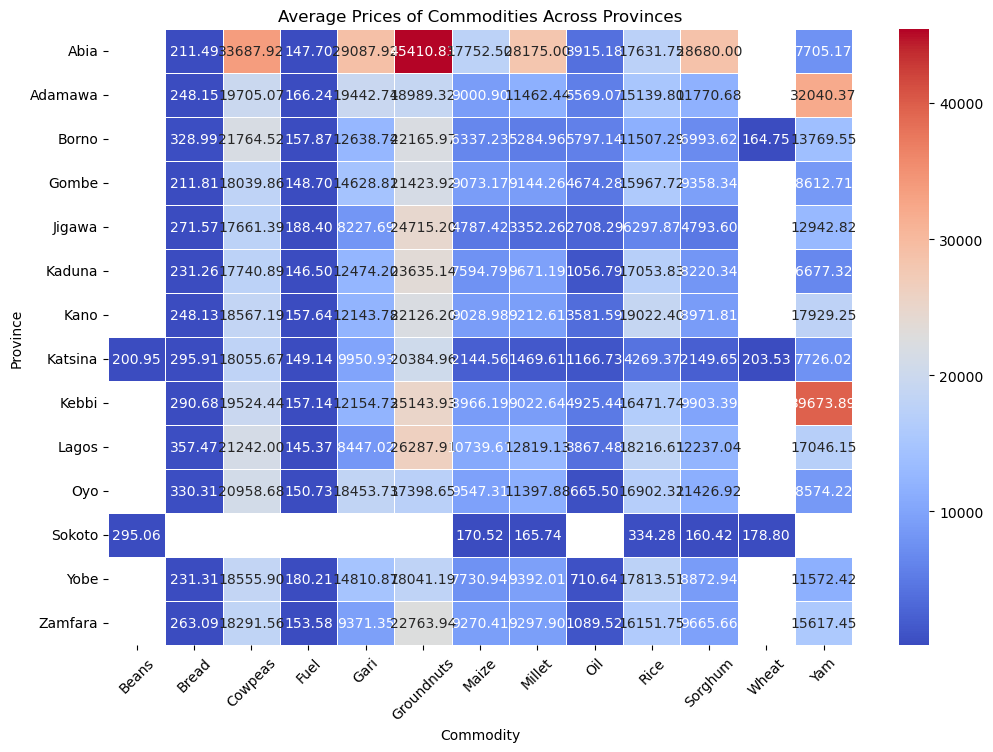

In [25]:
# Pivot the data to have provinces as rows, commodities as columns, and average prices as values
pivot_table = average_prices.pivot(index='admname', columns='pro', values='price')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Average Prices of Commodities Across Provinces')
plt.xlabel('Commodity')
plt.ylabel('Province')
plt.xticks(rotation=45)  
plt.show()

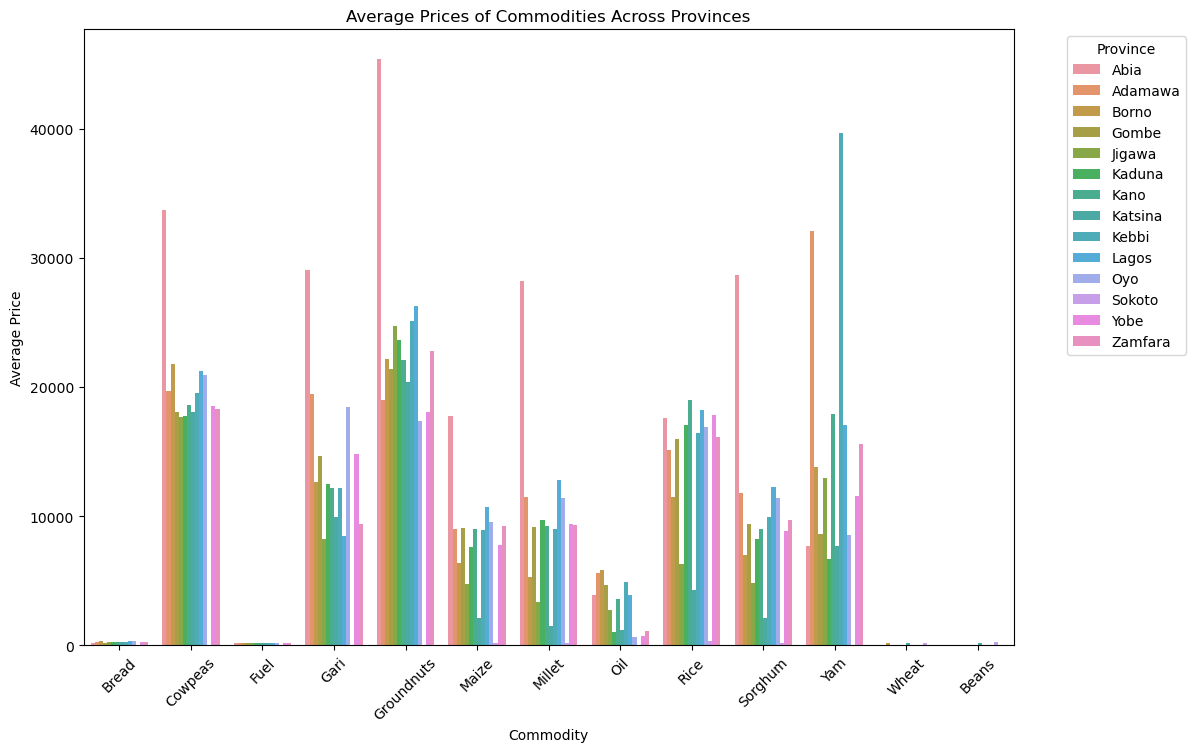

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='pro', y='price', hue='admname', data=average_prices, ci=None)
plt.title('Average Prices of Commodities Across Provinces')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Based on the graph, it shows that Abia has more expensive prices across all commodities while other vary based in respect to the goods. Also, as shown too, Bread, wheat, fuel, rice and beans had the similar prices in all states/provinces in comparsion with others as these product can be seen as a neccesarity

# Commodity

In [27]:
# Which commodities have seen the highest price increases or decreases?
df.head(1)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,...,cmid,ptid,umid,catid,sn,product,color,market_type,pro,market
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,...,55,15,33,1,1980_55_15_33,Bread,-,Retail,Bread,- Retail


In [28]:
df.groupby('cmname')['price'].max()

cmname
Beans (niebe) - Wholesale             419.1441
Bread - Retail                        609.7600
Cowpeas (brown) - Retail              443.5146
Cowpeas (brown) - Wholesale         41500.0000
Cowpeas (white) - Retail              413.7313
Cowpeas (white) - Wholesale         38960.0000
Fuel (diesel) - Retail                700.0000
Fuel (petrol-gasoline) - Retail       371.0000
Gari (white) - Retail                 345.3775
Gari (white) - Wholesale            32500.0000
Gari (yellow) - Retail                327.9051
Gari (yellow) - Wholesale           48600.0000
Groundnuts (shelled) - Retail         492.0000
Groundnuts (shelled) - Wholesale    52000.0000
Maize (white) - Retail                142.9698
Maize (white) - Wholesale           18000.0000
Maize (yellow) - Retail               175.0000
Maize (yellow) - Wholesale          19080.0000
Maize - Wholesale                     276.6509
Millet - Retail                       226.0000
Millet - Wholesale                  30000.0000
Oil (p

In [29]:
df.groupby('pro')['price'].max()

pro
Beans           419.1441
Bread           609.7600
Cowpeas       41500.0000
Fuel            700.0000
Gari          48600.0000
Groundnuts    52000.0000
Maize         19080.0000
Millet        30000.0000
Oil           19375.0000
Rice          53600.0000
Sorghum       30600.0000
Wheat           307.6923
Yam           90000.0000
Name: price, dtype: float64

In [30]:
df_sorted = df.sort_values(by='date')

# Calculate percentage change in prices for each commodity
df['price_change_pct'] = df_sorted.groupby('pro')['price'].pct_change() * 100

In [31]:
# Get commodities with the highest price increases
highest_increase = df.groupby('pro')['price_change_pct'].nlargest(1)

# Get commodities with the highest price decreases
highest_decrease = df.groupby('pro')['price_change_pct'].nsmallest(1)

In [32]:
print("Commodities with the highest price increases:")
print(highest_increase)

print("\nCommodities with the highest price decreases:")
print(highest_decrease)

Commodities with the highest price increases:
pro              
Beans       12470       72.820978
Bread       1596       331.519700
Cowpeas     9546     20782.058136
Fuel        3176       334.782609
Gari        1530     13423.735902
Groundnuts  1919      9845.811952
Maize       1283     17468.181818
Millet      9963     11203.370787
Oil         7482      4163.259304
Rice        8403     19777.892943
Sorghum     9334     13197.872340
Wheat       6081        64.261127
Yam         7713     77904.216444
Name: price_change_pct, dtype: float64

Commodities with the highest price decreases:
pro              
Beans       6086    -41.631375
Bread       9778    -69.099997
Cowpeas     4703    -98.990670
Fuel        2113    -79.142857
Gari        3440    -99.361176
Groundnuts  12853   -99.200612
Maize       9401    -99.450000
Millet      2693    -99.168000
Oil         10910   -97.165563
Rice        2529    -99.374080
Sorghum     12297   -99.280822
Wheat       6656    -37.425577
Yam         4401  

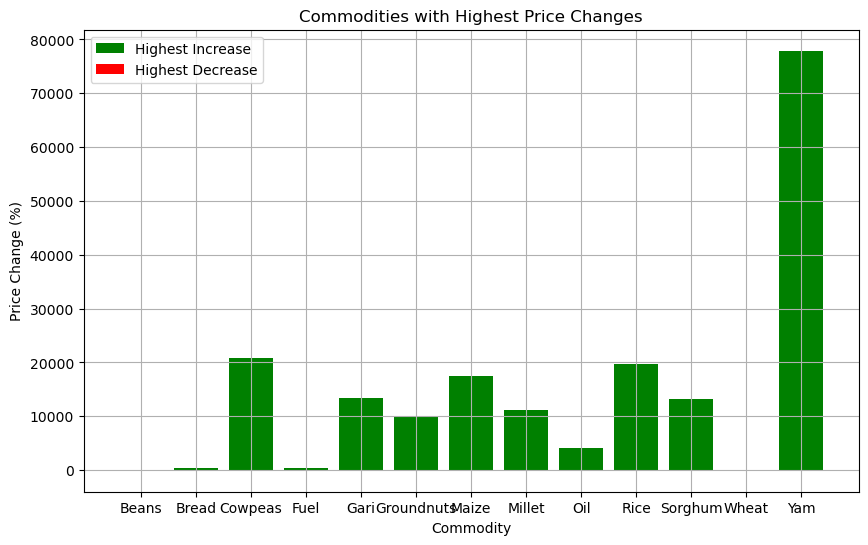

In [33]:
# Convert to DataFrame for plotting
highest_increase_df = highest_increase.reset_index()
highest_decrease_df = highest_decrease.reset_index()

# Plot
plt.figure(figsize=(10, 6))

plt.bar(highest_increase_df['pro'], highest_increase_df['price_change_pct'],
        color='green', label='Highest Increase')
plt.bar(highest_decrease_df['pro'], highest_decrease_df['price_change_pct'],
        color='red', label='Highest Decrease')

plt.title('Commodities with Highest Price Changes')
plt.xlabel('Commodity')
plt.ylabel('Price Change (%)')
plt.legend()
plt.grid(True)

plt.show()

## Based on this, this indicates that all commodities has high increase with Yam being the highest out of them oall followed by Cowpeas.

In [34]:
# How do prices vary across different categories of commodities? You can use boxplots.

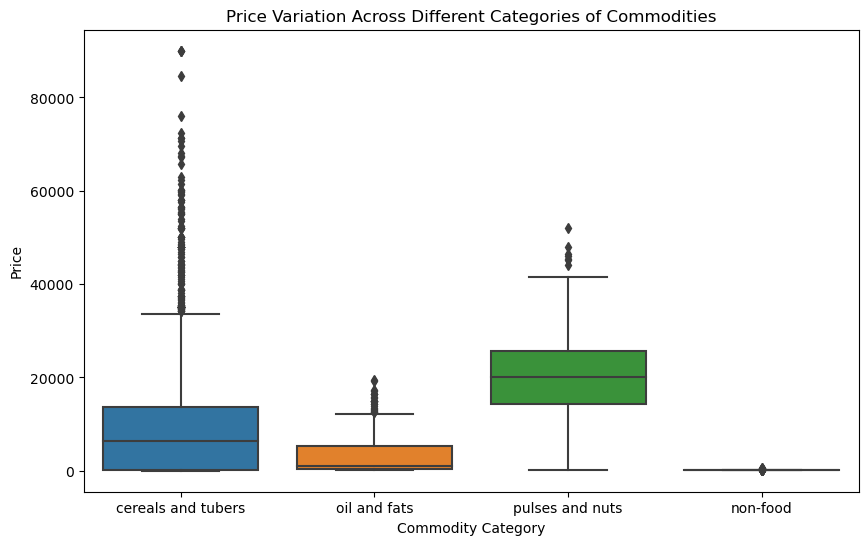

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price', data=df)
plt.title('Price Variation Across Different Categories of Commodities')
plt.xlabel('Commodity Category')
plt.ylabel('Price')
plt.show()

## Based on this, this indicates that cereals and tubers has the highest price variation followed by pulses and nuts.

In [36]:
# Are there categories that are more volatile in terms of pricing?

# Group the data by commodity category and measure variability
variability = df.groupby('category')['price'].std()

# Print the variability for each category
print("Variability (Standard Deviation) for Each Category:")
print(variability)

Variability (Standard Deviation) for Each Category:
category
cereals and tubers    9176.509600
non-food                48.933434
oil and fats          3625.379813
pulses and nuts       8138.254036
Name: price, dtype: float64


## Based on the result, it shows that cerals and tubers had more votalite compared to the others followed by pulses and nuts as showed in the price variation graph too

# Markets

In [37]:
# Which markets have the highest average prices for specific commodities?
average = df.groupby(['pro','mktname'])['price'].mean()

In [38]:
average

pro    mktname        
Beans  Illela (CBM)         295.061390
       Jibia (CBM)          212.351708
       Mai Adoua (CBM)      132.547250
Bread  Aba                  211.486742
       Biu                  251.567618
                              ...     
Yam    Lagos              17046.146502
       Maiduguri          14394.000198
       Mubi               32040.370791
       Potiskum            3511.955426
       Saminaka             144.833562
Name: price, Length: 202, dtype: float64

In [39]:
# Find the markets with the highest average prices for specific commodities
highest_average_price = average.groupby('pro').idxmax()

In [40]:
highest_average_price

pro
Beans         (Beans, Illela (CBM))
Bread            (Bread, Maiduguri)
Cowpeas              (Cowpeas, Aba)
Fuel               (Fuel, Potiskum)
Gari                    (Gari, Aba)
Groundnuts        (Groundnuts, Aba)
Maize                  (Maize, Aba)
Millet                (Millet, Aba)
Oil                (Oil, Maiduguri)
Rice                (Rice, Dawanau)
Sorghum              (Sorghum, Aba)
Wheat          (Wheat, Jibia (CBM))
Yam                   (Yam, Gwandu)
Name: price, dtype: object

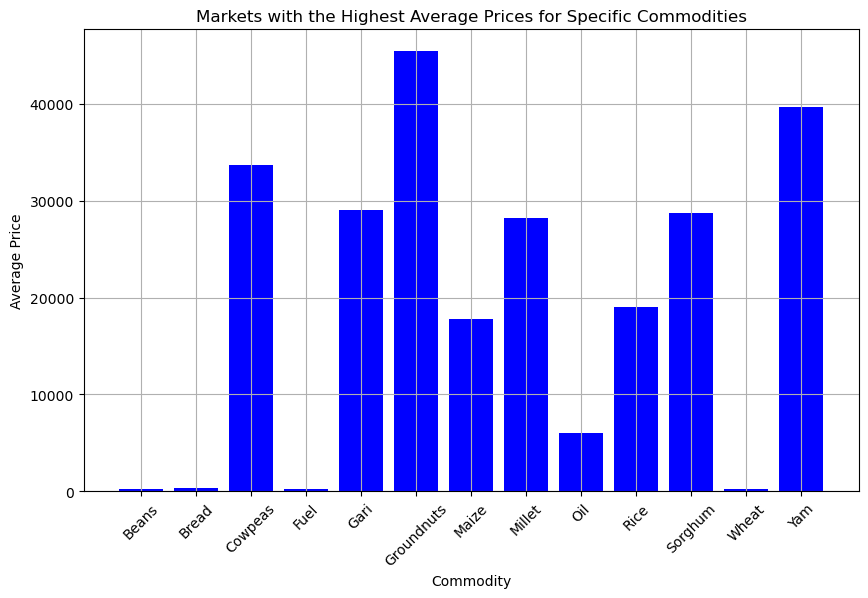

In [41]:
plt.figure(figsize=(10, 6))

# Extract commodity names and market names

commodities = [idx[0] for idx in highest_average_price]
markets = [idx[1] for idx in highest_average_price]

# Plot the bar plot
plt.bar(commodities, [average.loc[idx] for idx in highest_average_price], color='blue')

plt.title('Markets with the Highest Average Prices for Specific Commodities')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()

## Based on the result, it shows thatgroundnut has the highest average price for specific commodities followed by Yam

In [42]:
# Are there markets that show higher volatility in prices?

# Group the data by market and calculate variability 
variability = df.groupby('mktname')['price'].std()

# Print the variability for each market
print("Variability (Standard Deviation) for Each Market:")
print(variability)

Variability (Standard Deviation) for Each Market:
mktname
Aba                 13574.892943
Biu                  9452.594652
Damassack (CBM)       137.267840
Damaturu            11363.003846
Dandume              7962.580228
Dawanau              9001.306313
Giwa                 9152.257643
Gombe                8127.402808
Gujungu             10115.152545
Gwandu              12767.066297
Ibadan              10044.401195
Illela (CBM)           88.653625
Jibia (CBM)           118.374066
Kaura Namoda         8620.494016
Lagos               10735.590076
Mai Adoua (CBM)       110.209097
Mai Gatari (CBM)      114.481254
Maiduguri            9029.599743
Mubi                11478.347214
Potiskum             9738.253822
Saminaka             8652.460103
Name: price, dtype: float64


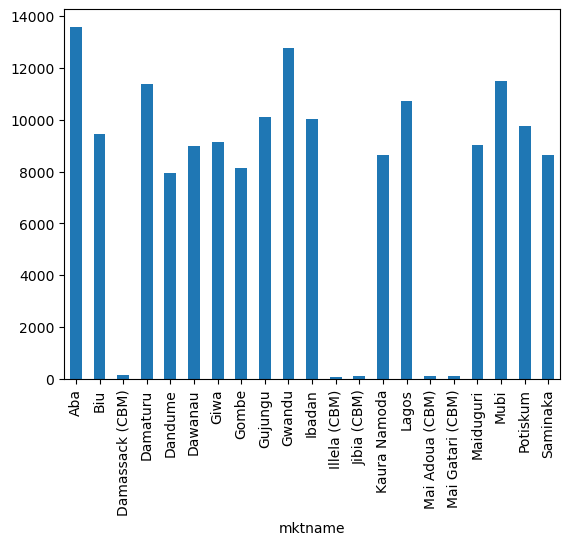

In [43]:
# plot graph
variability = df.groupby('mktname')['price'].std().plot.bar()

## This shows that Aba market under Abia has more variation followed by Gwandu. This implies that the prices of a commodity in a specific market can vary significantly over time. For example, if the price of a commodity in a market varies widely from day to day or week to week, it indicates high variation in prices. 